In [1]:
import pandas as pd

In [2]:
d = {}
with open("KG.txt") as f:
    d["kg"] = []
    d["arms"] = []
    for l in f:
        tmp = l.split()
        d["arms"].append(int(tmp[0].split(":")[1]))
        d["kg"].append(float(tmp[2].split(":")[1]))

with open("opt-KG.txt") as f:
    d["okg"] = []
    for l in f:
        tmp = l.split()
        d["okg"].append(float(tmp[2].split(":")[1]))

with open("LP.txt") as f:
    d["pbc"] = []
    for l in f:
        tmp = l.split()
        d["pbc"].append(float(tmp[2].split(":")[1]))

print(d)

{'kg': [30.006875, 60.00765625, 90.03125, 119.987421875, 150.035125, 179.98125, 209.99147321428572, 240.0016796875, 269.9972916666667, 300.0183125, 330.03122159090907, 359.99890625, 390.00723557692305, 419.96640625, 449.980625, 480.02123046875, 510.03139705882353, 540.0201041666667, 570.017384868421, 600.02828125, 630.0239732142857, 660.0355113636364, 690.0331521739131, 719.9817578125], 'arms': [40, 80, 120, 160, 200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920, 960], 'okg': [29.9721875, 60.02453125, 89.9321875, 119.9975, 150.04975, 180.00625, 210.00982142857143, 239.989140625, 269.97125, 300.02703125, 330.02073863636366, 360.002109375, 390.0180528846154, 420.00611607142855, 449.9984375, 479.94142578125, 509.99792279411764, 540.02625, 569.988125, 600.00990625, 630.0024553571428, 660.0284375, 689.9892119565218, 720.0258984375], 'pbc': [30.294765625, 60.799921875, 91.09088541666667, 121.6579296875, 151.99778125, 182.53161458333332, 212.8819419

In [17]:
df = pd.DataFrame(d)
df

,kg,arms,okg,pbc
0,30.006875,40,29.972188,30.294766
1,60.007656,80,60.024531,60.799922
2,90.031250,120,89.932187,91.090885
3,119.987422,160,119.997500,121.657930
4,150.035125,200,150.049750,151.997781
5,179.981250,240,180.006250,182.531615
6,209.991473,280,210.009821,212.881942
7,240.001680,320,239.989141,243.382109
8,269.997292,360,269.971250,273.787951
9,300.018312,400,300.027031,304.293953


In [18]:
df["lp"] = df.arms * 0.761718750

df["kg"] = df["lp"] - df["kg"]
df["okg"] = df["lp"] - df["okg"]
df["pbc"] = df["lp"] - df["pbc"]
df

,kg,arms,okg,pbc,lp
0,0.461875,40,0.496562,0.173984,30.46875
1,0.929844,80,0.912969,0.137578,60.93750
2,1.375000,120,1.474063,0.315365,91.40625
3,1.887578,160,1.877500,0.217070,121.87500
4,2.308625,200,2.294000,0.345969,152.34375
5,2.831250,240,2.806250,0.280885,182.81250
6,3.289777,280,3.271429,0.399308,213.28125
7,3.748320,320,3.760859,0.367891,243.75000
8,4.221458,360,4.247500,0.430799,274.21875
9,4.669188,400,4.660469,0.393547,304.68750


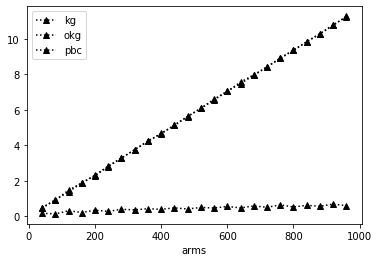

In [21]:
df.plot(x="arms", y=["kg", "okg", "pbc"], style="k:^")

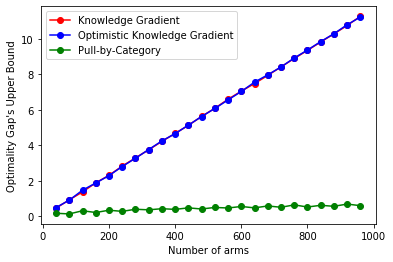

In [29]:
from matplotlib import pyplot as plt
plt.plot(df["arms"], df["kg"], "o-", label="Knowledge Gradient", color="r")
plt.plot(df["arms"], df["okg"], "o-", label="Optimistic Knowledge Gradient", color="b")
plt.plot(df["arms"], df["pbc"], "o-", label="Pull-by-Category", color="g")
plt.xlabel("Number of arms")
plt.ylabel("Optimality Gap's Upper Bound")
plt.legend()

plt.show()

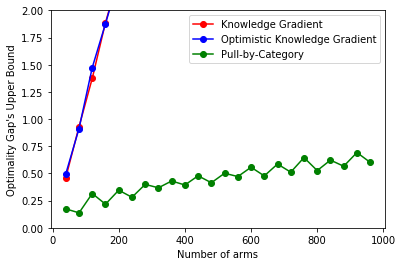

In [30]:
plt.plot(df["arms"], df["kg"], "o-", label="Knowledge Gradient", color="r")
plt.plot(df["arms"], df["okg"], "o-", label="Optimistic Knowledge Gradient", color="b")
plt.plot(df["arms"], df["pbc"], "o-", label="Pull-by-Category", color="g")
plt.xlabel("Number of arms")
plt.ylabel("Optimality Gap's Upper Bound")
plt.ylim(0, 2)
plt.legend()
plt.show()

In [1]:
import LP

In [2]:
LP.LP_sol(T=8)

Using license file /home/xz556/gurobi.lic


GurobiError: License expired 2020-12-07